In [1]:
# Enabling print for all lines
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Checking the working directory
import os
os.getcwd()

'C:\\Users\\Administrator\\Python_work\\Edureka'

In [2]:
import pandas as pd
import numpy as np

from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

import matplotlib.pyplot as plt
%matplotlib inline
# plt.figure(figsize=(17,8))
plt.rcParams["figure.figsize"] = [15,7]

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
# Now, we will load the data set and look at some initial rows and data types of the columns
data = pd.read_csv('AirPassengers.csv')
data.head()
data.info()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


1. `parse_dates`: This specifies the column which contains the date-time information. As we say above, the column name is ‘Month’.
2. `index_col`: A key idea behind using Pandas for TS data is that the index has to be the variable depicting date-time information. So this argument tells pandas to use the ‘Month’ column as index.
3. `date_parser`: This specifies a function which converts an input string into datetime variable. Be default Pandas reads data in format ‘YYYY-MM-DD HH:MM:SS’. If the data is not in this format, the format has to be manually defined. Something similar to the dataparse function defined here can be used for this purpose.

In [4]:
# The data contains a particular month and number of passengers travelling in that month.
# In order to read the data as a time series, we have to pass special arguments to the read_csv command

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
# Now we can see that the data has time object as index and #Passengers as the column
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

`Notice the dtype=’datetime[ns]’ which confirms that it is a datetime object`

In [6]:
ts = data['#Passengers']
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [7]:
# Selecting a particular value in the Series object
ts['1949-01-01']

# Use 'datetime' function from datetime library
ts[datetime(1949,1,1)]

# Specify the entire range
ts['1949-01-01':'1949-05-01']
ts[:'1949-05-01']

112

112

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

1. Unlike numeric indexing, the end index is included here. For instance, if we index a list as a[:5] then it would return the values at indices – [0,1,2,3,4]. But here the index ‘1949-05-01’ was included in the output.
2. The indices have to be sorted for ranges to work. If you randomly shuffle the index, this won’t work

**2. Check Stationarity of a Time Series**

- A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time
- Most of the TS models work on the assumption that the TS is stationary
- Intuitively, we can sat that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future
- Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, i.e.

    constant mean
    constant variance
    an autocovariance that does not depend on time

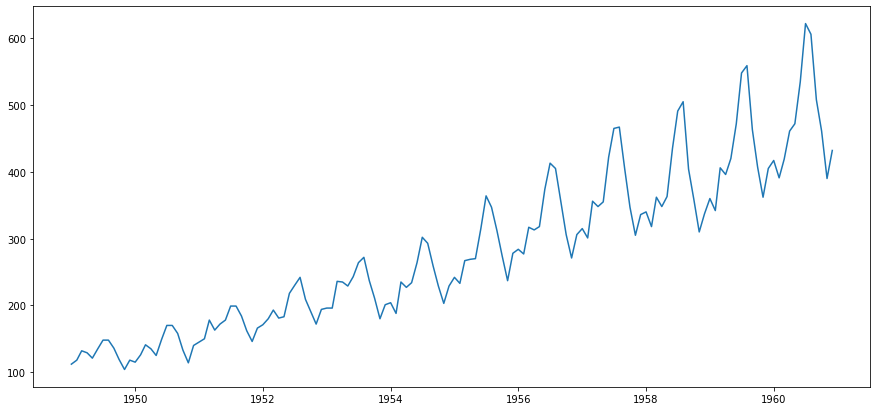

In [8]:
# Plotting the time series
plt.plot(ts);

In [9]:
# Checking stationarity of time series model
def test_stationarity(timeseries):
    
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()

    rolstd = timeseries.rolling(12).std()

    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

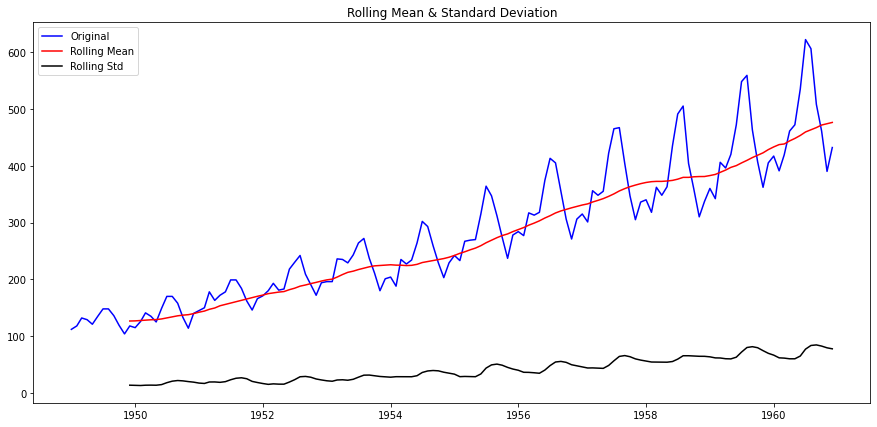

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [10]:
# Let’s run it for our input series
test_stationarity(ts)

`Though the variation in standard deviation is small, mean is clearly increasing with time and this is not a stationary series. Also, the test statistic is way more than the critical values`

**3. Make a Time Series Stationary**

Though stationarity assumption is taken in many TS models, almost none of practical time series are stationary. So statisticians have figured out ways to make series stationary, which we’ll discuss now. Actually, its almost impossible to make a series perfectly stationary, but we try to take it as close as possible.

Lets understand what is making a TS non-stationary. There are 2 major reasons behind non-stationaruty of a TS
1. Trend – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
2. Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

The underlying principle is to model or estimate the trend and seasonality in the series and remove those from the series to get a stationary series. Then statistical forecasting techniques can be implemented on this series. The final step would be to convert the forecasted values into the original scale by applying trend and seasonality constraints back.

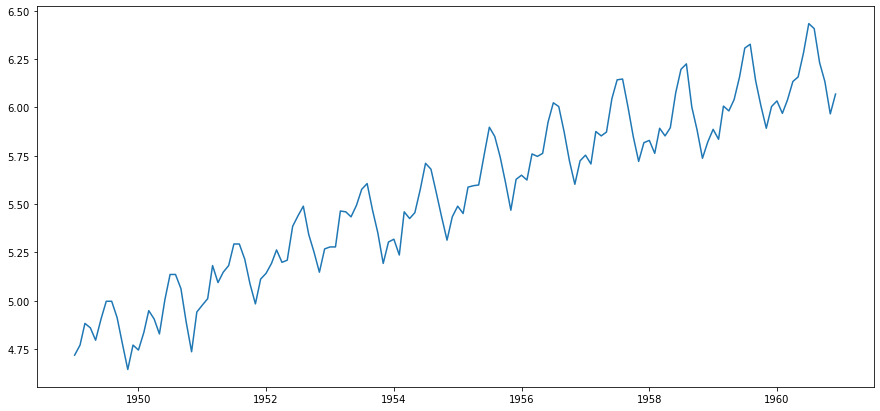

In [11]:
"""One of the first tricks to reduce trend can be transformation. For example, in this case we can clearly see that the there
is a significant positive trend. So we can apply transformation which penalize higher values more than smaller values"""
ts_log = np.log(ts)
plt.plot(ts_log);

In this simpler case, it is easy to see a forward trend in the data. But its not very intuitive in presence of noise. So we can use some techniques to estimate or model this trend and then remove it from the series. There can be many ways of doing it and some of most commonly used are

1. Aggregation – taking average for a time period like monthly/weekly averages
2. Smoothing – taking rolling averages
3. Polynomial Fitting – fit a regression model

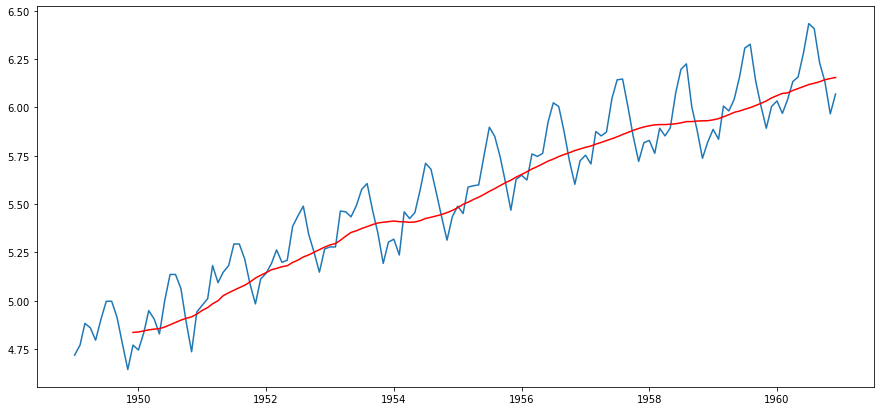

In [12]:
# Moving average
"""In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series.Here we can take the
average over the past 1 year, i.e. last 12 values"""

moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red');

In [13]:
"""The red line shows the rolling mean. Lets subtract this from the original series. Note that since we are taking average of
last 12 values, rolling mean is not defined for first 11 values"""
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

'The red line shows the rolling mean. Lets subtract this from the original series. Note that since we are taking average of\nlast 12 values, rolling mean is not defined for first 11 values'

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

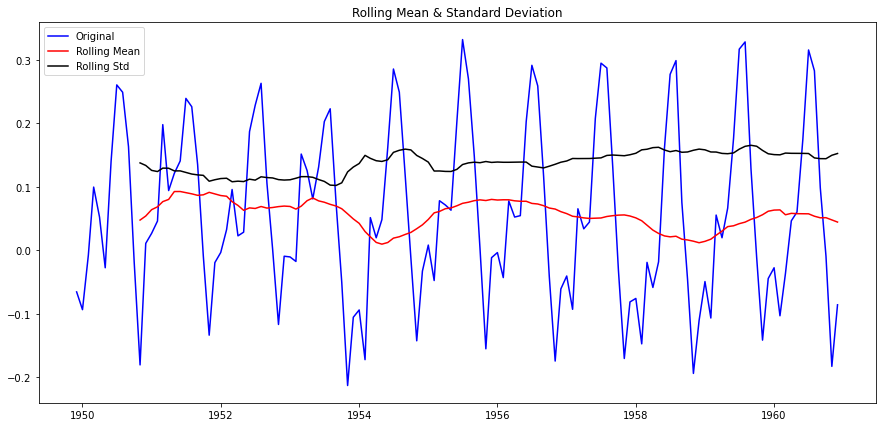

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [14]:
# Notice the first 11 being Nan. Lets drop these NaN values and check the plots to test stationarity.

ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

A drawback of the above approach is that the `time-period has to be strictly defined`. In this case we can take `yearly averages` but in complex situations like forecasting a stock price, its difficult to come up with a number. So we take a `weighted moving average` where more recent values are given a higher weight. There can be many technique for assigning weights. A popular one is `exponentially weighted moving average` where weights are assigned to all the previous values with a decay factor

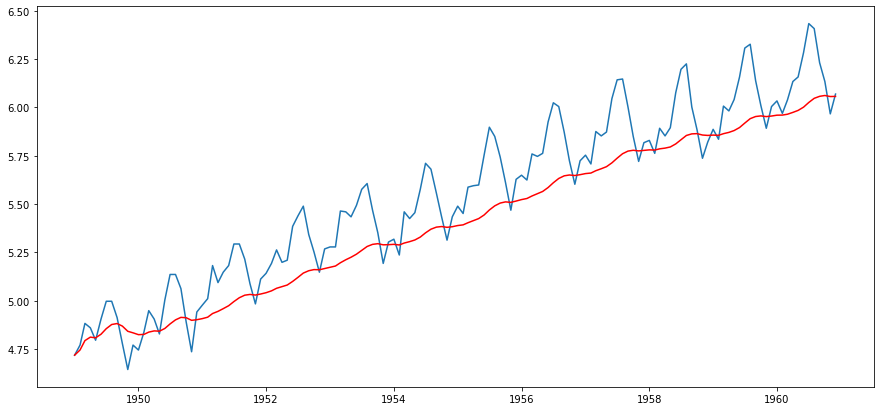

In [15]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red');

`The parameter 'halflife is used to define the amount of exponential decay. This is just an assumption here and would depend largely on the business domain`

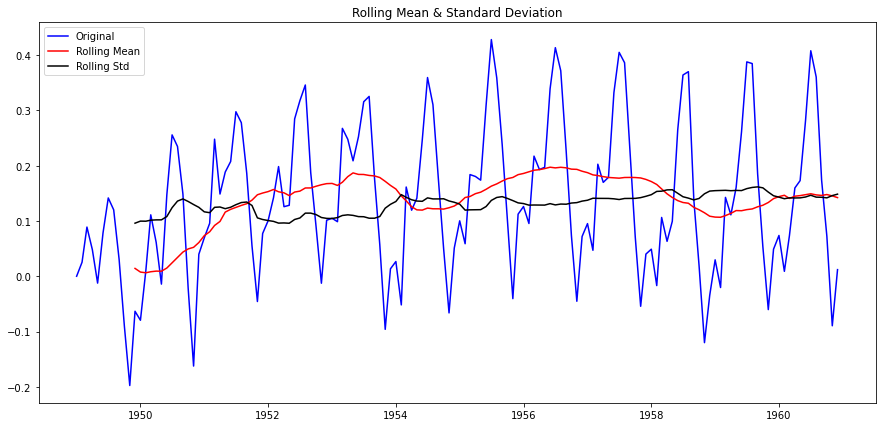

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [16]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

- This TS has even lesser variations in mean and standard deviation in magnitude
- Also, the test statistic is smaller than the 1% critical value, which is better than the previous case
- Note that in this case there will be no missing values as all values from starting are given weights

**4. Eliminating Trend and Seasonality**

The simple trend reduction techniques discussed above don’t work in all cases, particularly the ones with high seasonality. Lets discuss two ways of removing trend and seasonality

1. Differencing – taking the differece with a particular time lag
2. Decomposition – modeling both trend and seasonality and removing them from the model

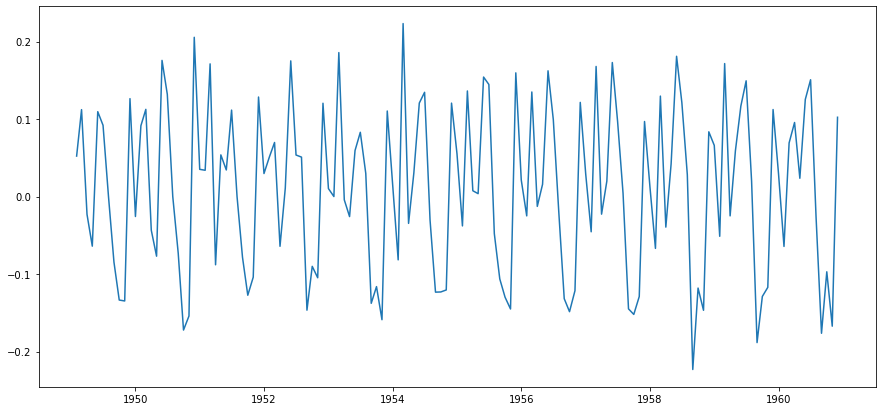

In [17]:
# Differencing
"""One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the
difference of the observation at a particular instant with that at the previous instant. This mostly works well in improving
stationarity. First order differencing can be done in Pandas"""
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff);

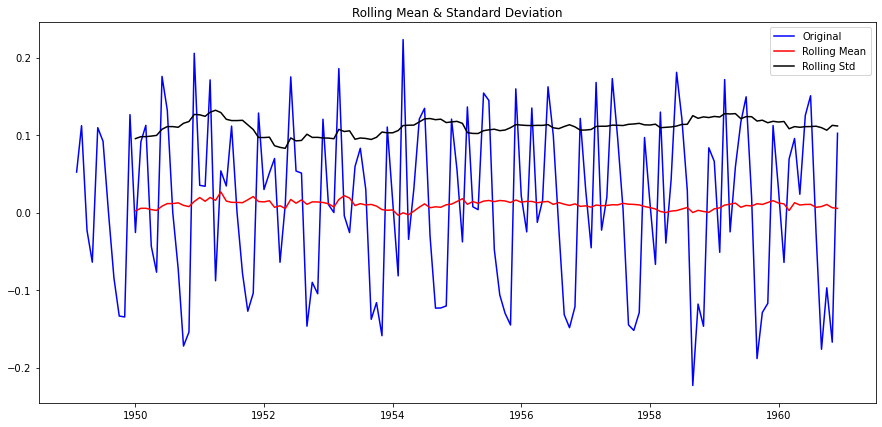

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [18]:
# This appears to have reduced trend considerably. Lets verify using our plots
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

- We can see that the mean and std variations have small variations with time
- Also, the Dickey-Fuller test statistic is less than the 10% critical value, thus the TS is stationary with 90% confidence
- We can also take second or third order differences which might get even better results in certain applications

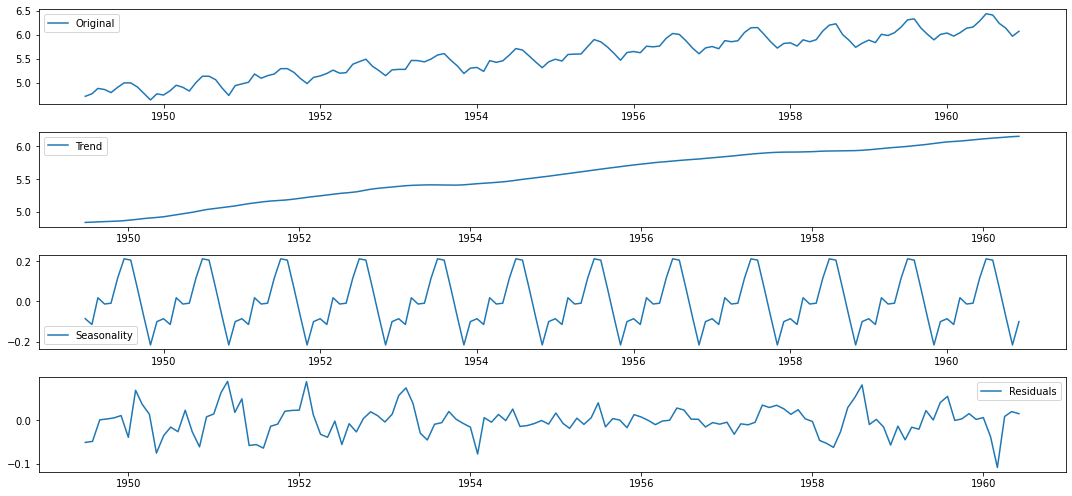

In [19]:
# Decomposing
# In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original'), plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend'), plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality'), plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals'), plt.legend(loc='best')
plt.tight_layout();

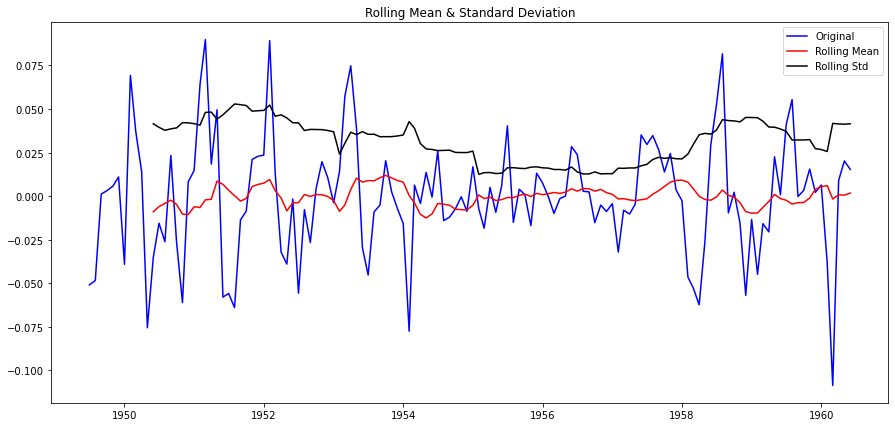

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [20]:
# Here we can see that the trend, seasonality are separated out from data and we can model the residuals
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

- The Dickey-Fuller test statistic is significantly lower than the 1% critical value
- So this TS is very close to stationary
- Advanced decomposition techniques can be tried out as well which can generate better results

**5. Forecasting a Time Series**

We saw different techniques and all of them worked reasonably well for making the TS stationary. Having performed the trend and seasonality estimation techniques, there can be two situations

    A strictly stationary series with no dependence among the values. This is the easy case wherein we can model the residuals as white noise. But this is very rare.
    A series with significant dependence among values. In this case we need to use some statistical models like ARIMA to forecast the data

`ARIMA` stands for **`Auto-Regressive Integrated Moving Averages`**. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model

1. Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5)
2. Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value
3. Number of Differences (d): These are the number of non-seasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results

An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

1. Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points)
2. Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4

In [21]:
# ACF and PACF plots
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

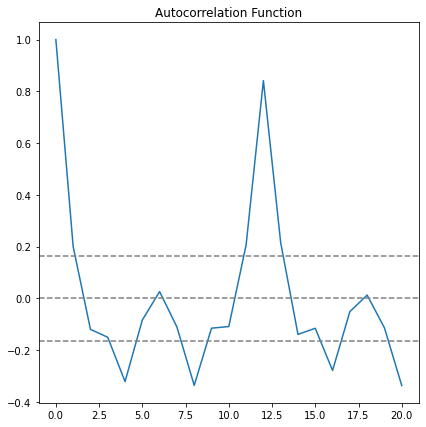

In [22]:
# Plot ACF
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function');

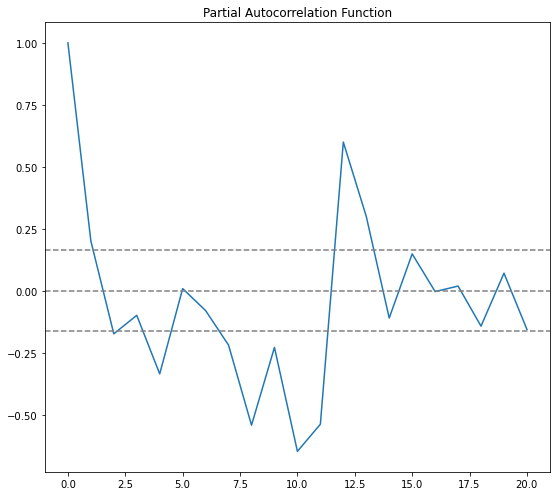

In [23]:
# Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout();

In the above plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as

    p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2
    q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2

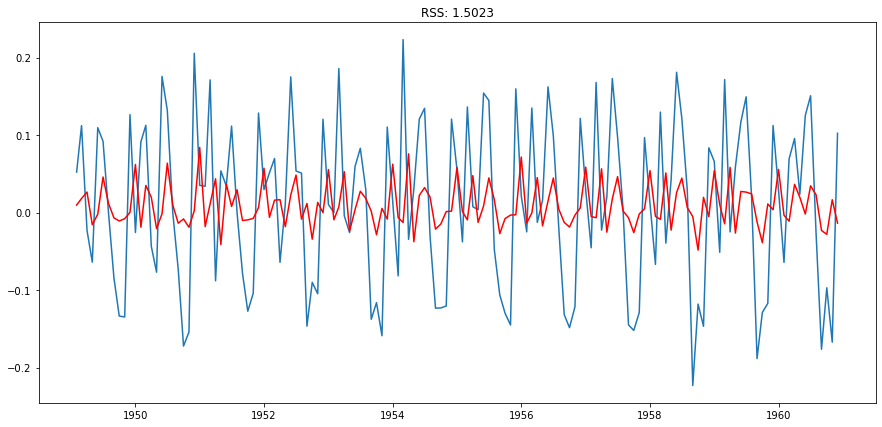

In [24]:
"""Now, lets make 3 different ARIMA models considering individual as well as combined effects. Will print the RSS for each.
Please note that here RSS is for the values of residuals and not actual series.

We load the ARIMA model first. The p,d,q values can be specified using the order argument of ARIMA which take a tuple(p,d,q)"""

# AR Model
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2));

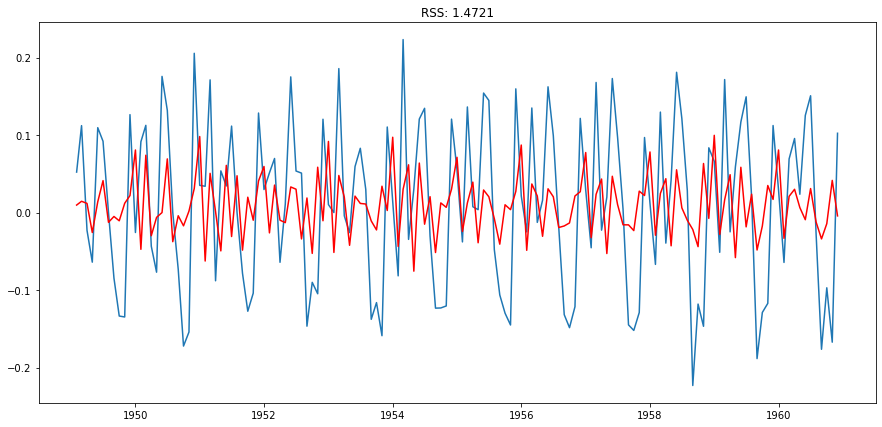

In [25]:
# MA Model
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2));

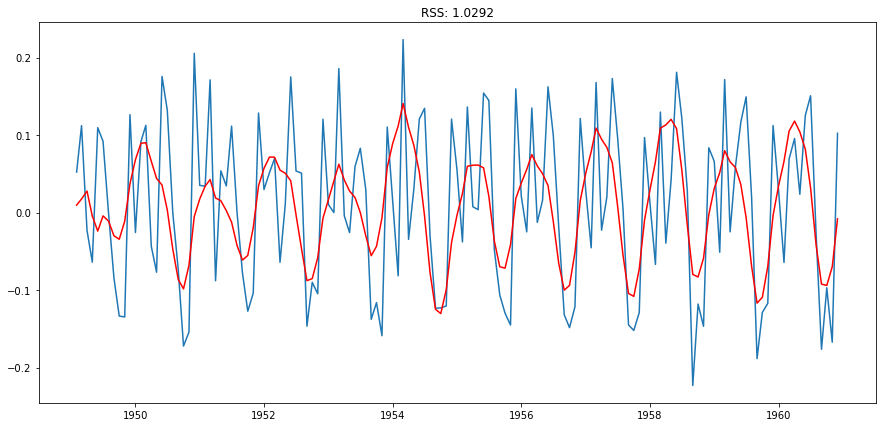

In [26]:
# Combined Model
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)

plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2));

In [27]:
# Taking it back to original scale
# Since the combined model gave best result, lets scale it back to the original values and see how well it performs there

predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [28]:
# Notice that these start from ‘1949-02-01’ and not the first month. This is because we took a lag by 1 and first element
# doesn’t have anything before it to subtract from. The way to convert the differencing to log scale is to add these
# differences consecutively to the base number. An easy way to do it is to first determine the cumulative sum at index and
# then add it to the base number. The cumulative sum is

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [29]:
# We have to add them to base number. For this lets create a series with all values as base number and add the differences to it
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

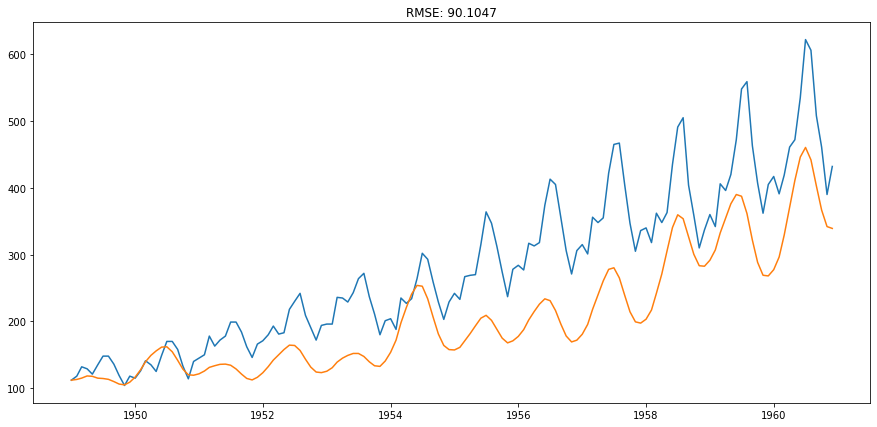

In [30]:
# Here the first element is base number itself and from thereon the values cumulatively added. Last step is to take the
# exponent and compare with the original series

predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)));